In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
path1 = r'E:\netData\MAG-nobel\Nobel papers CD.zip'
path2 = r'E:\netData\MAG-nobel\2 Nobel papers counterparts\Nobel counterparts CD.zip'

In [3]:
fNobel = pd.read_csv(path1)
fControl = pd.read_csv(path2)

In [4]:
fNobel

,paperid,paperyear,ref,cit,journal,doi,oecd1,oecd2,AUnum,volume,...,1stpage,lastpage,title,CD,DIsharp,DIeasy,ni,nj,nk,Field
0,2086860422,1973.0,17.0,5209.0,Journal of Physics C: Solid State Physics,10.1088/0022-3719/6/7/010,1. Natural Sciences,1.03 Physical sciences and astronomy,2.0,6.0,...,1181.0,1203.0,ordering metastability and phase transitions i...,0.160144,0.263410,0.718372,3742,1467,8997,Physics
1,2113166233,1983.0,NaN,2080.0,Physical Review Letters,10.1103/PhysRevLett.50.1153,1. Natural Sciences,1.03 Physical sciences and astronomy,1.0,50.0,...,1153.0,1156.0,nonlinear field theory of large spin heisenber...,1.000000,1.000000,1.000000,2080,0,0,Physics
2,2134803267,1998.0,1.0,3354.0,Physical Review Letters,10.1103/PhysRevLett.81.1562,1. Natural Sciences,1.03 Physical sciences and astronomy,125.0,81.0,...,1562.0,1567.0,evidence for oscillation of atmospheric neutrinos,0.924806,0.945549,0.978533,3282,72,117,Physics
3,1983987483,2002.0,NaN,2109.0,Physical Review Letters,10.1103/PhysRevLett.89.011301,1. Natural Sciences,1.03 Physical sciences and astronomy,206.0,89.0,...,11301.0,11301.0,direct evidence for neutrino flavor transforma...,1.000000,1.000000,1.000000,2109,0,0,Physics
4,2137229134,2001.0,8.0,1396.0,Physical Review Letters,10.1103/PhysRevLett.87.071301,1. Natural Sciences,1.03 Physical sciences and astronomy,206.0,87.0,...,71301.0,71301.0,measurement of the rate of ve d p p e interact...,0.170847,0.339149,0.668338,933,463,1355,Physics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2110457661,1919.0,NaN,409.0,The Journal of Physiology,10.1113/jphysiol.1919.sp001844,1. Natural Sciences,1.04 Chemical sciences,1.0,52.0,...,457.0,474.0,the supply of oxygen to the tissues and the re...,1.000000,1.000000,1.000000,409,0,0,Medicine
708,142463470,1910.0,NaN,234.0,Annals of Surgery,10.1097/00000658-191007000-00009,3. Medical and Health Sciences,3.02 Clinical medicine,1.0,52.0,...,83.0,95.0,viii on the experimental surgery of the thorac...,1.000000,1.000000,1.000000,234,0,0,Medicine
709,2052889597,1908.0,NaN,158.0,JAMA,10.1001/jama.1983.03340070050029,3. Medical and Health Sciences,3.02 Clinical medicine,1.0,250.0,...,944.0,953.0,results of the transplantation of blood vessel...,1.000000,1.000000,1.000000,158,0,0,Medicine
710,2067983941,1906.0,NaN,50.0,The American Journal of the Medical Sciences,10.1097/00000441-190609000-00006,3. Medical and Health Sciences,3.02 Clinical medicine,2.0,132.0,...,415.0,422.0,results of the biterminal transplantation of v...,1.000000,1.000000,1.000000,50,0,0,Medicine


In [5]:
fControl

,paperid,paperyear,ref,cit,journal,doi,oecd1,oecd2,AUnum,volume,issue,CD,DIsharp,DIeasy,ni,nj,nk,Field,title,type
0,1963605752,1973.0,9.0,4.0,Journal of Physics C: Solid State Physics,10.1088/0022-3719/6/7/020,1. Natural Sciences,1.03 Physical sciences and astronomy,3.0,6.0,7.0,-0.002361,0.001181,0.250000,1,3,843,Physics,interpretation of asymmetric band shapes in te...,Control group papers
1,1971689389,1973.0,25.0,23.0,Journal of Physics C: Solid State Physics,10.1088/0022-3719/6/7/017,1. Natural Sciences,1.03 Physical sciences and astronomy,2.0,6.0,7.0,-0.000358,0.001194,0.434783,10,13,8351,Physics,probabilities for radiative and nonradiative d...,Control group papers
2,1971831404,1973.0,6.0,7.0,Journal of Physics C: Solid State Physics,10.1088/0022-3719/6/7/004,1. Natural Sciences,1.04 Chemical sciences,3.0,6.0,7.0,-0.001036,0.003109,0.428571,3,4,958,Physics,low frequency raman spectra of single crystal ...,Control group papers
3,1972030500,1973.0,24.0,33.0,Journal of Physics C: Solid State Physics,10.1088/0022-3719/6/7/006,1. Natural Sciences,1.03 Physical sciences and astronomy,2.0,6.0,7.0,0.002356,0.008954,0.575758,19,14,2089,Physics,radiation damage in oxides i defect formation ...,Control group papers
4,1976414901,1973.0,28.0,7.0,Journal of Physics C: Solid State Physics,10.1088/0022-3719/6/7/009,1. Natural Sciences,1.01 Mathematics,2.0,6.0,7.0,-0.000133,0.000398,0.428571,3,4,7523,Physics,path integral theory of anharmonic crystals,Control group papers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22630,2070452631,1906.0,NaN,NaN,The American Journal of the Medical Sciences,10.1097/00000441-190609000-00037,3. Medical and Health Sciences,3.02 Clinical medicine,1.0,132.0,3.0,0.000000,0.000000,0.000000,0,0,0,Medicine,the calcium salts in certain headaches,Control group papers
22631,2071021540,1906.0,NaN,2.0,The American Journal of the Medical Sciences,10.1097/00000441-190609000-00009,3. Medical and Health Sciences,3.02 Clinical medicine,2.0,132.0,3.0,1.000000,1.000000,1.000000,2,0,0,Medicine,a new blood filaria of man filaria philippinensis,Control group papers
22632,2085197364,1906.0,NaN,NaN,The American Journal of the Medical Sciences,10.1097/00000441-190609000-00022,3. Medical and Health Sciences,3.02 Clinical medicine,2.0,132.0,3.0,0.000000,0.000000,0.000000,0,0,0,Medicine,uterine myomas heart disease and disorders of ...,Control group papers
22633,2089715609,1906.0,NaN,NaN,The American Journal of the Medical Sciences,10.1097/00000441-190609000-00014,3. Medical and Health Sciences,3.02 Clinical medicine,2.0,132.0,3.0,0.000000,0.000000,0.000000,0,0,0,Medicine,surgical aspects of digestive disorgers,Control group papers


# fig2

In [32]:
d1 = fNobel[fNobel['Field'] == 'Physics']['ni'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['ni'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['ni'].values

d4 = fControl[fControl['Field'] == 'Physics']['ni'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['ni'].values
d6 = fControl[fControl['Field'] == 'Medicine']['ni'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

In [33]:
print(scipy.stats.ttest_ind(d1 , d4, equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(d2 , d5, equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(d3 , d6, equal_var=False, alternative='two-sided'))

Ttest_indResult(statistic=5.40504666530424, pvalue=1.708024872132262e-07)
Ttest_indResult(statistic=4.374960445995692, pvalue=1.8790849712727343e-05)
Ttest_indResult(statistic=7.908238068192071, pvalue=6.427427615125778e-14)


In [34]:
d

[1243.26267281106,
 1591.3136363636363,
 1164.9927272727273,
 38.82479392274123,
 37.71765539582911,
 45.59162861491629]

In [31]:
d1 = np.array(d[:3])
d2 = np.array(d[3:])
(d1-d2)/d1

array([0.96877185, 0.97629779, 0.96086531])

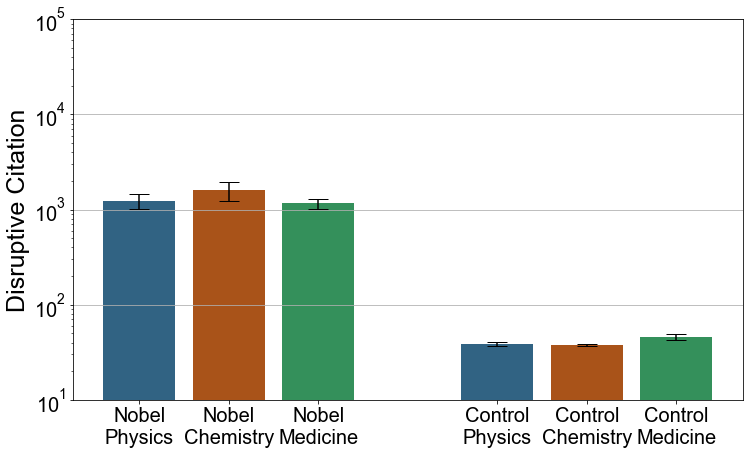

In [29]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
ax.set_yscale("log")
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks([10e0,10e1,10e2,10e3,10e4],size = 20)
plt.ylabel(r'Disruptive Citation',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\1.pdf",bbox_inches = 'tight')

In [35]:
d1 = fNobel[fNobel['Field'] == 'Physics']['CD'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['CD'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['CD'].values

d4 = fControl[fControl['Field'] == 'Physics']['CD'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['CD'].values
d6 = fControl[fControl['Field'] == 'Medicine']['CD'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

In [36]:
print(scipy.stats.ttest_ind(d1 , d4, equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(d2 , d5, equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(d3 , d6, equal_var=False, alternative='two-sided'))

Ttest_indResult(statistic=2.8070498895353255, pvalue=0.005414271900447724)
Ttest_indResult(statistic=1.7897620383155468, pvalue=0.07480202905231582)
Ttest_indResult(statistic=2.031643698973184, pvalue=0.043065837934038904)


In [37]:
d

[0.7409576563679466,
 0.5294723558354187,
 0.41362020508722386,
 0.6641885085598401,
 0.4754392176289378,
 0.35935359659448485]

In [12]:
d1 = np.array(d[:3])
d2 = np.array(d[3:])
(d1-d2)/d1

array([0.10360801, 0.10205091, 0.13119912])

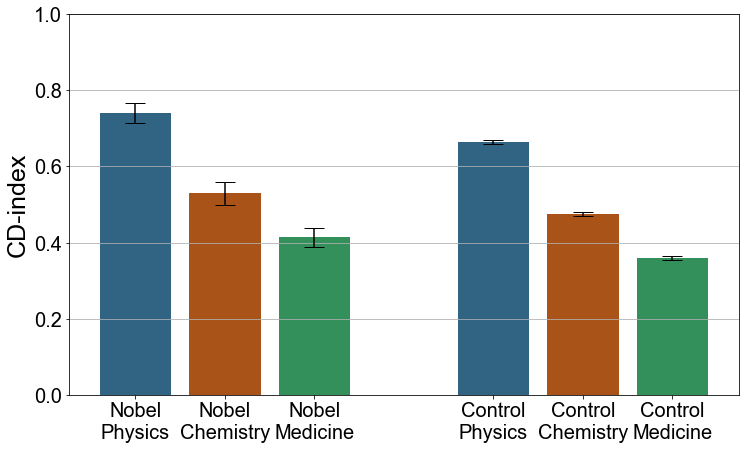

In [13]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.ylim((0,1))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel(r'CD-index',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\2.pdf",bbox_inches = 'tight')

In [14]:
d1 = fNobel[fNobel['Field'] == 'Physics']['nj'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['nj'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['nj'].values

d4 = fControl[fControl['Field'] == 'Physics']['nj'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['nj'].values
d6 = fControl[fControl['Field'] == 'Medicine']['nj'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

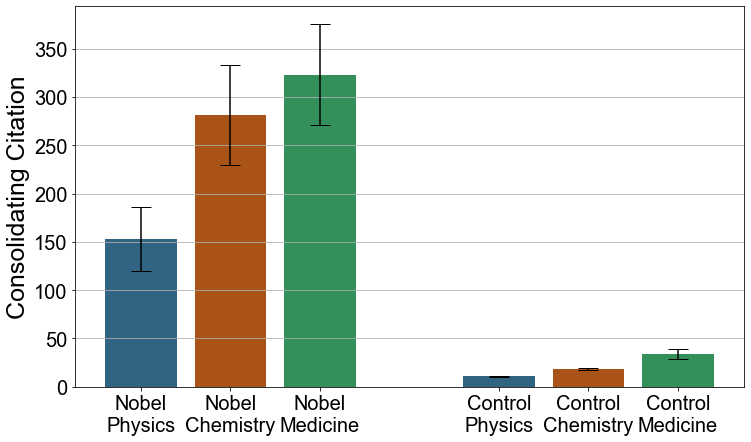

In [15]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
#plt.ylim((0,80))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel(r'Consolidating Citation',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\3.pdf",bbox_inches = 'tight')

In [39]:
d1 = fNobel[fNobel['Field'] == 'Physics']['DIsharp'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['DIsharp'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['DIsharp'].values

d4 = fControl[fControl['Field'] == 'Physics']['DIsharp'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['DIsharp'].values
d6 = fControl[fControl['Field'] == 'Medicine']['DIsharp'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

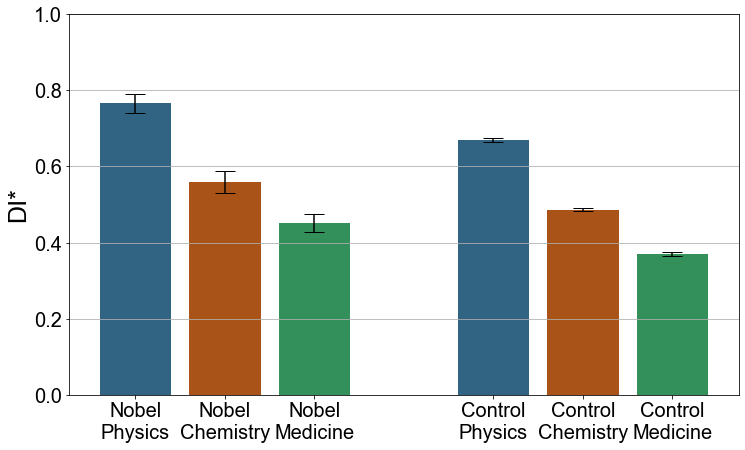

In [41]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.ylim((0,1))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel('DI*',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\4.pdf",bbox_inches = 'tight')

In [42]:
d1 = fNobel[fNobel['Field'] == 'Physics']['DIeasy'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['DIeasy'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['DIeasy'].values

d4 = fControl[fControl['Field'] == 'Physics']['DIeasy'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['DIeasy'].values
d6 = fControl[fControl['Field'] == 'Medicine']['DIeasy'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

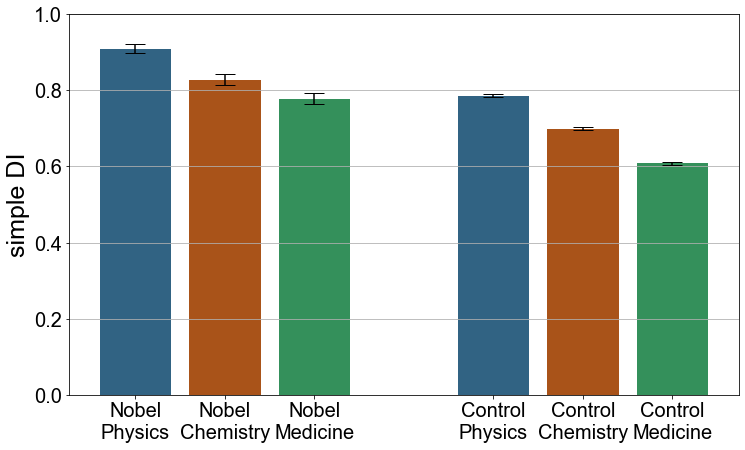

In [43]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.ylim((0,1))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel('simple DI',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\5.pdf",bbox_inches = 'tight')